# 실습3 대출 신용정보 평가 (분류, 회귀)

대출 신용정보 평가를 위해 분류와 회귀 모델을 모두 사용하는 실습 코드를 준비했습니다. Kaggle에서 유명하고 풍부한 데이터셋인 "Loan Prediction Problem" 데이터셋을 사용하겠습니다.

데이터셋 링크: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

대출 상태를 분류하고
대출 금액을 회귀분석 하는 실습입니다.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# 데이터 로드
data = pd.read_csv('credit.csv')
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [78]:
# 필요한 열 선택
data = data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
             'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [79]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History 열에는 결측값이 있습니다.
# 결측값을 자율적으로 처리해보세요.
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

<ipython-input-79-28586de2c9da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
<ipython-input-79-28586de2c9da>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [80]:
# 카테고리형 변수를 숫자로 매핑
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    data[col] = le.fit_transform(data[col])

In [81]:
# 특성과 타겟 분리
target = data['Loan_Status'].to_numpy()
# 학습용 데이터
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)

# 분류를 위한 평가 데이터
y_class = data['Loan_Status']

# 회귀를 위한 평가 데이터
y_reg = data['LoanAmount']

In [82]:
# 훈련 데이터와 검증 데이터 분리
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(X, y_class, test_size = 0.2, random_state = 40)

In [83]:
훈련용_data2, 테스트용_data2, 훈련용_target2, 테스트용_target2 = train_test_split(X, y_reg, test_size = 0.2, random_state = 40)

### (분류)로지스틱 회귀

In [48]:
# 모델 정의
lr = LogisticRegression()

In [49]:
# 모델 학습

lr.fit(훈련용_data,훈련용_target)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# 모델 추론
lr_예측결과 = lr.predict(테스트용_data)
lr_예측결과

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [51]:
# 모델 평가
print(lr.score(훈련용_data, 훈련용_target))
print(lr.score(테스트용_data, 테스트용_target))
# 분류 보고서 출력
print("Logistic Regression Classification Report:")
print(classification_report(테스트용_target, lr_예측결과))

# 혼동 행렬 출력
print("Confusion Matrix:")
print(confusion_matrix(테스트용_target, lr_예측결과))

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(테스트용_target, lr_예측결과))

0.8044806517311609
0.8373983739837398
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.83      0.99      0.90        92

    accuracy                           0.84       123
   macro avg       0.88      0.69      0.72       123
weighted avg       0.85      0.84      0.81       123

Confusion Matrix:
[[12 19]
 [ 1 91]]
Accuracy Score:
0.8373983739837398


### (분류)랜덤포레스트

In [52]:
# 모델 정의
rf = RandomForestClassifier()

In [53]:
# 모델 학습
rf.fit(훈련용_data, 훈련용_target)

RandomForestClassifier()

In [54]:
# 모델 추론
rf_예측결과 = rf.predict(테스트용_data)
rf_예측결과

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [55]:
# 모델 평가
print(rf.score(훈련용_data, 훈련용_target))
print(rf.score(테스트용_data, 테스트용_target))
# 분류 보고서 출력
print("Logistic Regression Classification Report:")
print(classification_report(테스트용_target, rf_예측결과))

# 혼동 행렬 출력
print("Confusion Matrix:")
print(confusion_matrix(테스트용_target, rf_예측결과))

# 정확도 출력
print("Accuracy Score:")
print(accuracy_score(테스트용_target, rf_예측결과))

1.0
0.7967479674796748
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        31
           1       0.82      0.93      0.87        92

    accuracy                           0.80       123
   macro avg       0.74      0.66      0.68       123
weighted avg       0.78      0.80      0.78       123

Confusion Matrix:
[[12 19]
 [ 6 86]]
Accuracy Score:
0.7967479674796748


In [56]:
# Feature Importance 계산 및 시각화
feature_importances = rf.feature_importances_
feature_names = X.columns

In [57]:
# Feature Importance를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

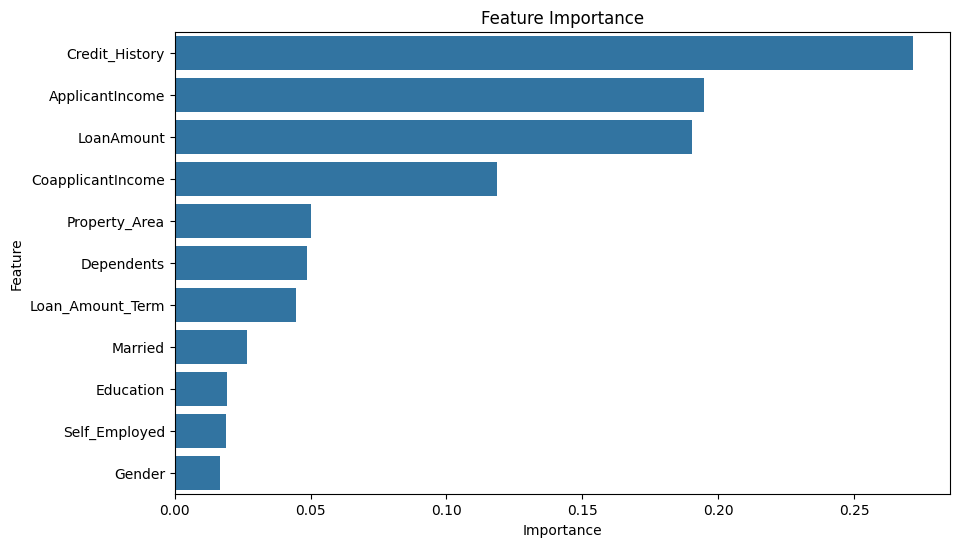

In [58]:
# Feature Importance 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### (회귀)선형회귀 모델

In [59]:
# 모델 정의
lre = LinearRegression()

In [84]:
# 모델 학습
lre.fit(훈련용_data2, 훈련용_target2)

LinearRegression()

In [86]:
# 모델 추론
lre_예측결과 = lre.predict(테스트용_data2)
lre_예측결과

array([138., 259., 160.,  97., 120., 200., 108.,  84., 144., 111., 187.,
       135., 112., 100., 120., 119., 120.,  60.,  55., 134., 113.,  75.,
       151.,  50., 180., 200.,  75., 132., 111., 114., 225., 105., 138.,
       136., 125.,  76., 110.,  96.,  17., 300., 181., 132., 127., 120.,
        96., 110.,  55., 125., 165., 153.,  56., 128., 128., 161., 173.,
       122.,  87., 176., 126., 194., 105., 496., 152., 122., 128., 134.,
       143.,  98., 280., 279., 275.,  96., 118., 128.,  54., 116., 128.,
       110., 205., 160., 260., 108., 130., 133.,  66., 137., 330., 150.,
       160.,  56., 172.,  88., 210., 205.,  67.,  90., 112., 128., 141.,
       185.,  46., 110., 148., 168., 152.,  40.,  72., 495., 138., 182.,
       120., 173., 128.,  70.,  45., 188., 110., 104.,  90., 160., 255.,
       380., 115.])

In [87]:
# 회귀 모델 평가
print("\nLinear Regression:")

# 평균 제곱 오차 계산 및 출력
mse = mean_squared_error(테스트용_target2,lre_예측결과)
print("Mean Squared Error:", mse)

# 회귀계수 값 계산 및 출력
r2 = r2_score(테스트용_target2,lre_예측결과)
print("R-squared:", r2)


Linear Regression:
Mean Squared Error: 4.3486016147998454e-24
R-squared: 1.0


# (회귀) 앙상블 기법을 이용한 회귀 알고리즘 적용

In [30]:
# 아무 앙상블 기법이나 이용해보세요.
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(LinearRegression(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)

bag_reg.fit(X, y_reg)
bag_reg_예측결과 = bag_reg.predict(X)
print("Bagging Regressor Evaluation:")
bag_mse = mean_squared_error(y_reg, bag_reg_예측결과)
print("Mean Squared Error:", bag_mse)

bag_r2 = r2_score(y_reg, bag_reg_예측결과)
print("R-squared:", bag_r2)

Bagging Regressor Evaluation:
Mean Squared Error: 6.774115101884158e-26
R-squared: 1.0


### 데이터 시각화

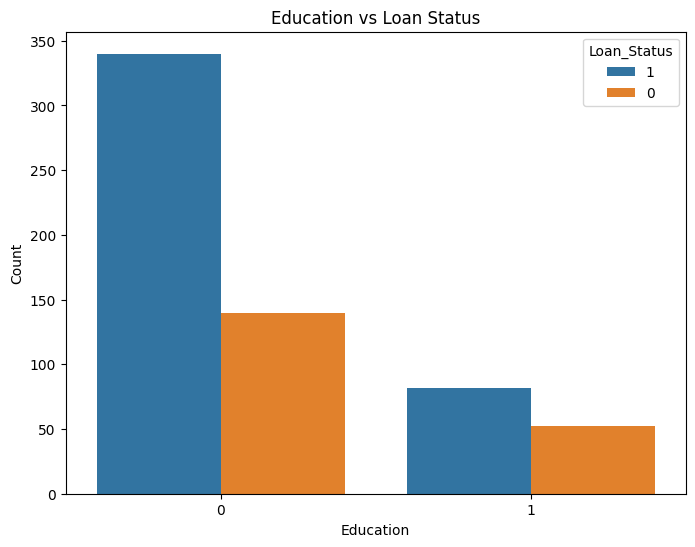

In [31]:
# 시각화
plt.figure(figsize=(8, 6))
# 데이터 복사 및 Loan_Status 열의 데이터 타입을 문자열로 변환
data_viz = data.copy()
data_viz['Loan_Status'] = data_viz['Loan_Status'].astype(str)
sns.countplot(x='Education', hue='Loan_Status', data=data_viz)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

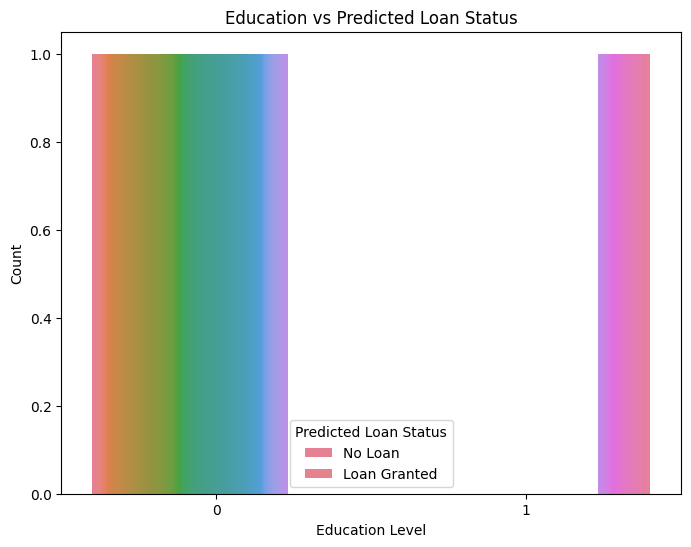

In [32]:
# 분류 결과에 대한 시각화
plt.figure(figsize=(8, 6))
# X_val 인덱스를 사용하여 원본 데이터에서 해당 행을 추출하고, 예측 결과를 문자열로 변환
viz_df = data.loc[data.index.isin(테스트용_data.index)].copy()
viz_df['Predicted Loan Status'] = lr_예측결과.astype(str)
sns.countplot(x='Education', hue='Predicted Loan Status', data=viz_df)
plt.title('Education vs Predicted Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Predicted Loan Status', labels=['No Loan', 'Loan Granted'])
plt.show()

In [90]:
test_data = pd.read_csv('test_Y3wMUE5_7gLdaTN .csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [91]:
test_data = test_data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
             'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [92]:
# Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History 열에는 결측값이 있습니다.
# 결측값을 자율적으로 처리해보세요.
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

<ipython-input-92-e024784510a6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
<ipython-input-92-e024784510a6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [93]:
le = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    test_data[col] = le.fit_transform(test_data[col])

In [94]:
X = test_data.drop(['Loan_ID'], axis=1)

In [95]:
lr_결과 = lr.predict(X)
rf_결과 = rf.predict(X)
lre_결과 = lre.predict(X)

In [96]:
test = pd.DataFrame({
    'Loan_ID	' :  test_data['Loan_ID'],
    'LogisticRegression' : lr_결과,
    'RandomForestClassifier' : rf_결과,
    'LinearRegression' : lre_결과
})

In [97]:
test.to_csv('test_data.csv', index = False)